In [87]:
from mpl_toolkits.basemap import Basemap
import matplotlib
import matplotlib.pyplot as plt
import pylab
import numpy as np
import pandas
import geoplotter
%matplotlib inline

Use geoplotter to create a basic plot of the world. 
This should come up just by calling the right functions of geoplotter
,and you shouldn’t need to do much extra work.

In [88]:
WorldMap = geoplotter.GeoPlotter()
# default arguments



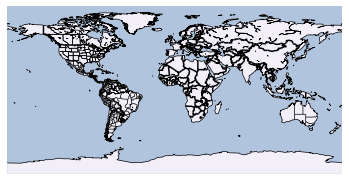

In [52]:
#print WorldMap.getAxes()

WorldMap.drawWorld()

plt.savefig('World.pdf')

plt.show()

Write some python code to: 
    1) read in NMC_v4_0.csv into a Pandas data set 
    2) Given a year, and a COW Country Code, be able to pull out the CINC of the country 
    3) Get all the unique COW Country Codes.

In [89]:
NMC = pandas.read_csv('NMC_v4_0.csv')


def extractCINC(Year = 1816,CountryCode = 2):
    return NMC[(NMC['year'] == Year) & (NMC['ccode'] == CountryCode)]['cinc']

NMC.ccode.unique()


array([  2,  20,  31,  40,  41,  42,  51,  52,  53,  54,  55,  56,  57,
        58,  60,  70,  80,  90,  91,  92,  93,  94,  95, 100, 101, 110,
       115, 130, 135, 140, 145, 150, 155, 160, 165, 200, 205, 210, 211,
       212, 220, 221, 223, 225, 230, 232, 235, 240, 245, 255, 260, 265,
       267, 269, 271, 273, 275, 280, 290, 300, 305, 310, 315, 316, 317,
       325, 327, 329, 331, 332, 335, 337, 338, 339, 341, 343, 344, 345,
       346, 349, 350, 352, 355, 359, 360, 365, 366, 367, 368, 369, 370,
       371, 372, 373, 375, 380, 385, 390, 395, 402, 403, 404, 411, 420,
       432, 433, 434, 435, 436, 437, 438, 439, 450, 451, 452, 461, 471,
       475, 481, 482, 483, 484, 490, 500, 501, 510, 511, 516, 517, 520,
       522, 530, 531, 540, 541, 551, 552, 553, 560, 565, 570, 571, 572,
       580, 581, 590, 591, 600, 615, 616, 620, 625, 630, 640, 645, 651,
       652, 660, 663, 666, 670, 678, 679, 680, 690, 692, 694, 696, 698,
       700, 701, 702, 703, 704, 705, 710, 712, 713, 730, 731, 73

Download the world borders shape file cshapes_0.4-2.zip from: http://downloads.weidmann.ws/cshapes/Shapefiles/.
After unzipping, use the readShapefile method on geoplotter to read in the shape file. Look through the _info variable to see what pieces of data are associated with each shape. Specifically, the COWCODE data for a shape tells you what country that shape belongs to. Use drawShapes to draw the United States in a different color be sure to 1) write a loop to collect all the shapes associated with the US 2) draw all of those shapes in the color you chose.

In [90]:
#readShapefile
WorldMap.readShapefile('/Users/mridulamaddukuri/Dropbox/python/Computational Optimization/cshapes_0.4-2/cshapes','shapeinfo')
# 1
# USA = [d for d in WorldMap.m.shapeinfo_info if d['COWCODE'] in [2]]
USA_shape = []
USA_index = []

for i in range(len(WorldMap.m.shapeinfo_info)):
    if WorldMap.m.shapeinfo_info[i]['COWCODE'] in [2]:
        USA_shape = USA_shape + WorldMap.m.shapeinfo[i]
        USA_index = USA_index + [i]
      
# USA_string = ''.join(str(e) for e in USA_index)


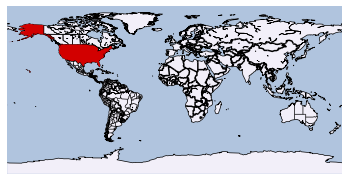

In [91]:
WorldMap.drawWorld()
WorldMap.drawShapes('shapeinfo',USA_index,facecolor = (0.82400814813704837, 0.0, 0.0, 1.0))

# matplotlib.cm.hot(0.3) gives 

In [100]:
class MilexPlotter(geoplotter.GeoPlotter):
    def readData(self):
        self.NMC = pandas.read_csv('NMC_v4_0.csv')
        self.readShapefile('/Users/mridulamaddukuri/Dropbox/python/Computational Optimization/cshapes_0.4-2/cshapes','shapeinfo')
    def drawWorld(self):
        """Draws oceans, continents, coastlines, countries, and states."""
        self.drawMapBoundary()
        self.fillContinents(color = 'blue')
        self.drawCoastLines(linewidth=0.7)
        self.drawCountries(linewidth=1.2)
        self.drawStates(linewidth=0.7)
    def plotCountry(self,code,**kwargs):
        self.country_shape = []
        self.country_idx = []
        for i in range(len(self.m.shapeinfo_info)):
            if self.m.shapeinfo_info[i]['COWCODE'] in [code]:
                self.country_shape = self.country_shape + self.m.shapeinfo[i]
                self.country_idx = self.country_idx + [i]
        #self.drawWorld()
        self.drawShapes('shapeinfo',self.country_idx,**kwargs)
    def setNormalize(self):
        self.normalized = matplotlib.colors.Normalize(vmin =0, vmax = self.NMC.cinc.max())
    def plotYear(self,year):
        self.clear()
        self.drawWorld()
        self.setNormalize()
        # min here is -9 not 0 
        # problem is here colors are not changing and only one country changes color to yellow at a time
        for i in self.NMC[self.NMC.year == year].ccode:
            self.cinc = self.NMC[(self.NMC['year'] == year) & (self.NMC['ccode'] == i)]['cinc']
            self.plotCountry(i,facecolor = matplotlib.cm.hot(self.normalized(self.cinc))) # enter color as a keyword argument
            # zorder 
            #plt.savefig(str(Y)+ "_" + str(i)+ ".png")
        
 
    

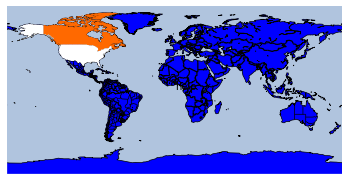

In [106]:
trial = MilexPlotter()
trial.readData()
trial.drawWorld()
trial.setNormalize()
trial.plotCountry(20,facecolor = (1.0, 0.41078460453384119, 0.0, 1.0)) 

trial.plotCountry(2,facecolor = 'white')
trial.figureText(1,1,"helo")
#trial.Normalize()
#trial.normalized(0.4)
#for i in NMC.year:
#    trail.plotYear(i)

#matplotlib.cm.hot(trial.normalized(0.1))

In [59]:
normalized = matplotlib.colors.Normalize(vmin =0, vmax = trial.NMC.cinc.max())
normalized(trial.NMC.cinc)
matplotlib.cm.hot(normalized(trial.NMC.cinc))

array([[ 0.30926595,  0.        ,  0.        ,  1.        ],
       [ 0.27838141,  0.        ,  0.        ,  1.        ],
       [ 0.28867626,  0.        ,  0.        ,  1.        ],
       ..., 
       [ 0.0416    ,  0.        ,  0.        ,  1.        ],
       [ 0.0416    ,  0.        ,  0.        ,  1.        ],
       [ 0.0416    ,  0.        ,  0.        ,  1.        ]])

In [62]:
normalized(0.4)
# video starts from 1916 ?????
# add year to the plot 


1.042037078284338

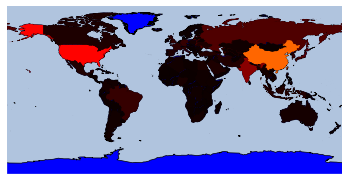

In [102]:
for Y in trial.NMC.year.unique():
    trial.plotYear(Y)
    plt.savefig(str(Y)+ ".png")
    


TypeError: figureText() takes exactly 4 arguments (2 given)

In [70]:
trial.NMC.cinc.max()
trial.NMC.cinc.min()
#trial.readData()
#trial.NMC

#trial.m.shapeinfo
# the minimum is -9 not 0

,stateabb,ccode,year,irst,milex,milper,pec,tpop,upop,cinc,version


In [87]:
matplotlib.cm.hot(normalized(0.036126))

(0.28867625730643637, 0.0, 0.0, 1.0)

In [44]:
NMC[NMC.cinc==-9]

,stateabb,ccode,year,irst,milex,milper,pec,tpop,upop,cinc,version
1747,PAN,95,1903,-9,-9,-9,-9,NaN,NaN,-9,4
1748,PAN,95,1904,-9,-9,-9,-9,NaN,NaN,-9,4
1749,PAN,95,1905,-9,-9,-9,-9,NaN,NaN,-9,4
1750,PAN,95,1906,-9,-9,-9,-9,NaN,NaN,-9,4
1751,PAN,95,1907,-9,-9,-9,-9,NaN,NaN,-9,4
1752,PAN,95,1908,-9,-9,-9,-9,NaN,NaN,-9,4
1753,PAN,95,1909,-9,-9,-9,-9,NaN,NaN,-9,4
1754,PAN,95,1910,-9,-9,-9,-9,NaN,NaN,-9,4
1755,PAN,95,1911,-9,-9,-9,-9,NaN,NaN,-9,4
1756,PAN,95,1912,-9,-9,-9,-9,NaN,NaN,-9,4


SyntaxError: invalid syntax (<ipython-input-42-93d95a4c6434>, line 2)